In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from geopy.distance import geodesic
import sys
import matplotlib.pyplot as plt

data = pd.read_csv(os.path.join('data','Zomato.csv'))
data.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [44]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,9595.000000,9584.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9789.000000,9999.000000
mean,29.542366,4.630645,16.895320,70.175579,17.414607,70.877970,1.024102,0.748698,26.418042
std,5.818045,0.329823,8.331404,23.204172,7.337139,21.175339,0.841582,0.574079,9.385898
min,15.000000,1.000000,-30.902872,-88.352885,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.913041,73.170937,12.984179,73.300937,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546258,75.902847,18.626258,76.022471,1.000000,1.000000,26.000000
75%,35.000000,4.800000,22.727021,78.047250,22.785128,78.128057,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [45]:
data.shape

(9999, 20)

In [46]:
data.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            404
Delivery_person_Ratings        415
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    389
Time_Order_picked                0
Weather_conditions             144
Road_traffic_density           140
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            210
Festival                        39
City                           270
Time_taken (min)                 0
dtype: int64

In [47]:
data.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [48]:
df = data.drop(["ID","Delivery_person_ID","Delivery_person_Age", "Delivery_person_Ratings","Order_Date","Festival"],axis=1)
df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min)
0,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,Metropolitian,46
1,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,Metropolitian,23
2,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,Metropolitian,21
3,30.899584,75.809346,30.919584,75.829346,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,Metropolitian,20
4,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,19.065838,72.832658,19.155838,72.922658,17:30,17:45,Sandstorms,Medium,0,Drinks,motorcycle,1.0,Metropolitian,42
9995,12.323978,76.627961,12.453978,76.757961,21:40,21:45,Windy,Jam,2,Meal,electric_scooter,1.0,Metropolitian,30
9996,17.412330,78.449654,17.492330,78.529654,17:20,17:35,Fog,Medium,0,Buffet,motorcycle,1.0,Metropolitian,34
9997,22.515082,88.367830,22.625082,88.477830,20:55,21:05,Sunny,Jam,0,Snack,motorcycle,1.0,Urban,32


In [49]:
df['Time_Order_picked'].unique()
count=0
for i in df['Time_Order_picked']:
    if i < str(1.0):
       count += 1
count 

862

In [50]:
df['Time_Orderd'] = df['Time_Orderd'].astype(object) 


In [51]:
count = 0
for j in df['Time_Orderd']:
    try:
        if j < str(1):
            df['Time_Orderd'] =df['Time_Orderd'].str.replace(j,"00:00") 
            print(j)
        else:
            pass
    except Exception as e:
        continue




0.458333333
0.958333333
0.791666667
0.875
0.958333333
0.375
0.791666667
0.958333333
0.625
0.375
0.833333333
0.666666667
0.791666667
0.75
0.458333333
0.458333333
0.875
0.416666667
0.916666667
0.958333333
0.75
0.791666667
0.375
0.458333333
0.666666667
0.875
0.791666667
0.75
0.791666667
0.833333333
0.416666667
0.875
0.916666667
0.875
0.625
0.75
0.791666667
0.791666667
0.5
0.458333333
0.958333333
0.75
0.5
0.875
0.791666667
0.791666667
0.416666667
0.5
0.875
0.708333333
0.416666667
0.958333333
0.458333333
0.375
0.833333333
0.916666667
0.416666667
0.875
0.916666667
0.916666667
0.708333333
0.5
0.791666667
0.958333333
0.916666667
0.458333333
0.5
0.541666667
0.5
0.416666667
0.958333333
0.875
0.875
0.916666667
0.958333333
0.916666667
0.5
0.875
0.958333333
0.833333333
0.958333333
0.958333333
0.916666667
0.416666667
0.416666667
0.541666667
0.583333333
0.791666667
0.791666667
0.75
0.833333333
0.458333333
0.833333333
0.958333333
0.875
0.833333333
0.625
0.916666667
0.833333333
0.375
0.75
0.416666667
0

In [52]:
df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min)
0,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,Metropolitian,46
1,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,Metropolitian,23
2,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,Metropolitian,21
3,30.899584,75.809346,30.919584,75.829346,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,Metropolitian,20
4,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,19.065838,72.832658,19.155838,72.922658,17:30,17:45,Sandstorms,Medium,0,Drinks,motorcycle,1.0,Metropolitian,42
9995,12.323978,76.627961,12.453978,76.757961,21:40,21:45,Windy,Jam,2,Meal,electric_scooter,1.0,Metropolitian,30
9996,17.412330,78.449654,17.492330,78.529654,17:20,17:35,Fog,Medium,0,Buffet,motorcycle,1.0,Metropolitian,34
9997,22.515082,88.367830,22.625082,88.477830,20:55,21:05,Sunny,Jam,0,Snack,motorcycle,1.0,Urban,32


In [53]:
df['Time_Orderd']=df['Time_Orderd'].fillna('00:00')

In [54]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('00:0083333333','00:00')
df['Time_Orderd'] = df['Time_Orderd'].str.replace('00:0041666667','00:00')


In [55]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '9:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '8:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '00:00', '9:45', '8:40',
       '17:25', '19:45', '19:10', '10:55', '21:40', '16:45', '11:30',
       '15:10', '22:45', '22:10', '20:45', '22:50', '17:55', '9:25',
       '20:15', '22:25', '22:40', '23:50', '15:25', '10:20', '20:55',
       '10:40', '15:55', '20:10', '12:10', '15:30', '10:35', '21:10',
       '20:50', '12:35', '23:40', '18:15', '18:20', '11:45', '12:45',
       '23:30', '10:50', '21:25', '10:10', '17:50', '22:20', '12:40',
       '23:55', '10:25', '8:45', '23:45', '19:55', '22:15', '23:10',
       '9:15', '18:25', '18:45', '16:50', '1', '14:20', '10:15', '8:50',
       '17:45', '16:35', '8:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12:50', '9:10', '12:30', '17:10', '19:15', '17:20',
       '18:30', '13:10', 

<Axes: >

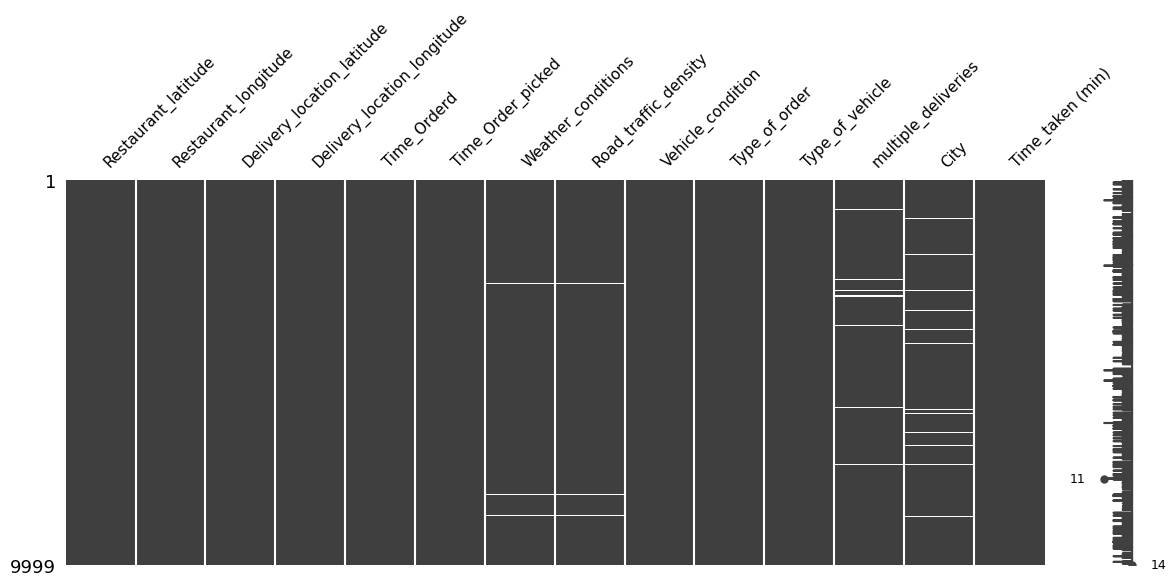

In [56]:
import missingno as msno

msno.matrix(df, figsize=(14,5), fontsize=11)

In [57]:
df.drop(df.index[599:600], inplace=True)

In [58]:
df.iloc[[599]]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min)
600,19.131141,72.813074,19.19114,72.873074,22:55,0.958333333,Fog,Low,0,Meal,motorcycle,1.0,Metropolitian,28


In [59]:
df['Time_Orderd'].iloc[[603]]

604    19:30
Name: Time_Orderd, dtype: object

In [60]:
df['Time_Orderd'].describe()

count      9998
unique      162
top       00:00
freq       1207
Name: Time_Orderd, dtype: object

In [61]:
df.isna().sum()

Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Time_Orderd                      0
Time_Order_picked                0
Weather_conditions             144
Road_traffic_density           140
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            210
City                           270
Time_taken (min)                 0
dtype: int64

In [62]:
df = df.drop(['Time_Orderd','Time_Order_picked'],axis=1)
df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min)
0,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,Metropolitian,46
1,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,Metropolitian,23
2,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,Metropolitian,21
3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,Metropolitian,20
4,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,19.065838,72.832658,19.155838,72.922658,Sandstorms,Medium,0,Drinks,motorcycle,1.0,Metropolitian,42
9995,12.323978,76.627961,12.453978,76.757961,Windy,Jam,2,Meal,electric_scooter,1.0,Metropolitian,30
9996,17.412330,78.449654,17.492330,78.529654,Fog,Medium,0,Buffet,motorcycle,1.0,Metropolitian,34
9997,22.515082,88.367830,22.625082,88.477830,Sunny,Jam,0,Snack,motorcycle,1.0,Urban,32


In [63]:
df.loc[df['Weather_conditions'].isna(), 'Weather_conditions'] = 'Sunny'

In [64]:
df.loc[df['Road_traffic_density'].isna(), 'Road_traffic_density'] = 'Low'

In [65]:
df.loc[df['City'].isna(), 'City'] = 'Semi-Urban'

In [66]:
df.isna().sum()

Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Weather_conditions               0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            210
City                             0
Time_taken (min)                 0
dtype: int64

In [67]:
df.loc[df['multiple_deliveries'].isna(), 'multiple_deliveries'] = 3.0

In [68]:
conditon = df['Restaurant_latitude']== 0
df= df[~conditon]



In [69]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000
mean,18.366105,76.286635,18.925316,77.044917,1.020659,0.797869,26.453517
std,6.959476,10.912731,5.478384,3.555281,0.842803,0.654994,9.387364
min,-30.902872,-88.352885,9.967144,72.778726,0.000000,0.000000,10.000000
25%,12.979166,73.897902,13.062532,73.950626,0.000000,0.000000,19.000000
50%,18.994237,76.619103,19.105838,76.672620,1.000000,1.000000,26.000000
75%,22.748060,78.368855,22.815835,78.410350,2.000000,1.000000,33.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [70]:
df['Distance'] = df.apply(lambda row: round(geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']), (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).km,2), axis=1,)

/tmp/ipykernel_578/1719519075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = df.apply(lambda row: round(geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']), (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).km,2), axis=1,)


In [71]:
df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),Distance
0,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,Metropolitian,46,10.27
1,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,Metropolitian,23,6.23
2,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,Metropolitian,21,13.76
3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,Metropolitian,20,2.93
4,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,Metropolitian,41,19.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,19.065838,72.832658,19.155838,72.922658,Sandstorms,Medium,0,Drinks,motorcycle,1.0,Metropolitian,42,13.75
9995,12.323978,76.627961,12.453978,76.757961,Windy,Jam,2,Meal,electric_scooter,1.0,Metropolitian,30,20.17
9996,17.412330,78.449654,17.492330,78.529654,Fog,Medium,0,Buffet,motorcycle,1.0,Metropolitian,34,12.27
9997,22.515082,88.367830,22.625082,88.477830,Sunny,Jam,0,Snack,motorcycle,1.0,Urban,32,16.62


In [72]:
df['Restaurant_latitude'] = round(df['Restaurant_latitude'],2)
df['Restaurant_longitude'] = round(df['Restaurant_longitude'],2)
df['Delivery_location_latitude'] = round(df['Delivery_location_latitude'],2)
df['Delivery_location_longitude'] = round(df['Delivery_location_longitude'],2)

/tmp/ipykernel_578/2890901078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Restaurant_latitude'] = round(df['Restaurant_latitude'],2)
/tmp/ipykernel_578/2890901078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Restaurant_longitude'] = round(df['Restaurant_longitude'],2)
/tmp/ipykernel_578/2890901078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [73]:
df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),Distance
0,30.33,78.05,30.40,78.12,Fog,Jam,2,Snack,motorcycle,3.0,Metropolitian,46,10.27
1,10.00,76.31,10.04,76.35,Stormy,High,1,Meal,motorcycle,1.0,Metropolitian,23,6.23
2,18.56,73.92,18.65,74.01,Sandstorms,Medium,1,Drinks,scooter,1.0,Metropolitian,21,13.76
3,30.90,75.81,30.92,75.83,Sandstorms,Low,0,Buffet,motorcycle,0.0,Metropolitian,20,2.93
4,26.46,80.37,26.59,80.50,Fog,Jam,1,Snack,scooter,1.0,Metropolitian,41,19.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,19.07,72.83,19.16,72.92,Sandstorms,Medium,0,Drinks,motorcycle,1.0,Metropolitian,42,13.75
9995,12.32,76.63,12.45,76.76,Windy,Jam,2,Meal,electric_scooter,1.0,Metropolitian,30,20.17
9996,17.41,78.45,17.49,78.53,Fog,Medium,0,Buffet,motorcycle,1.0,Metropolitian,34,12.27
9997,22.52,88.37,22.63,88.48,Sunny,Jam,0,Snack,motorcycle,1.0,Urban,32,16.62


<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken (min)'>

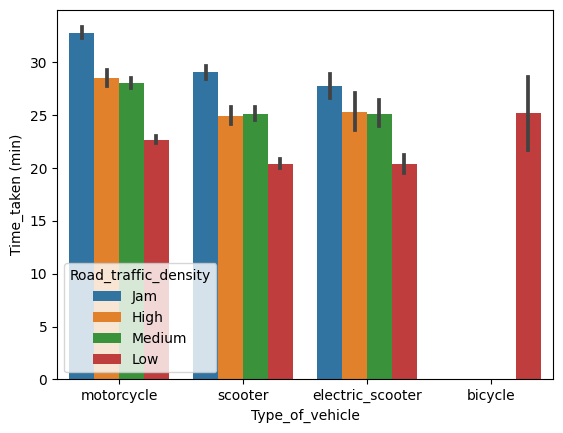

In [74]:
sns.barplot(data=df, x="Type_of_vehicle", y="Time_taken (min)", hue="Road_traffic_density")

<Axes: xlabel='Weather_conditions', ylabel='Time_taken (min)'>

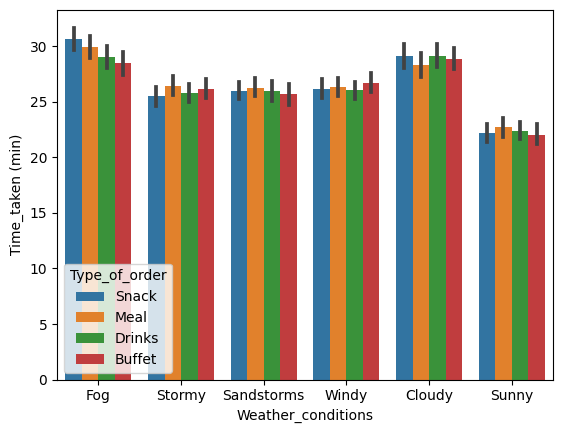

In [75]:
sns.barplot(data=df, x="Weather_conditions", y="Time_taken (min)", hue="Type_of_order")

<Axes: xlabel='Distance', ylabel='Density'>

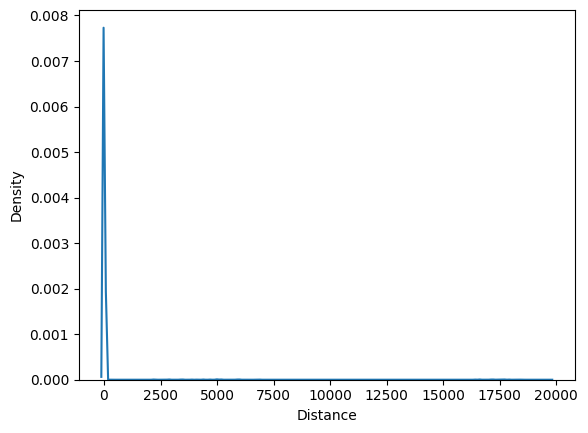

In [76]:

sns.kdeplot(data=df, x="Distance", bw_adjust=.2)

In [77]:
condition = df['Distance'] > 20
df.drop(df[condition].index, inplace=True)

/tmp/ipykernel_578/2770889632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[condition].index, inplace=True)


<Axes: xlabel='Distance', ylabel='Density'>

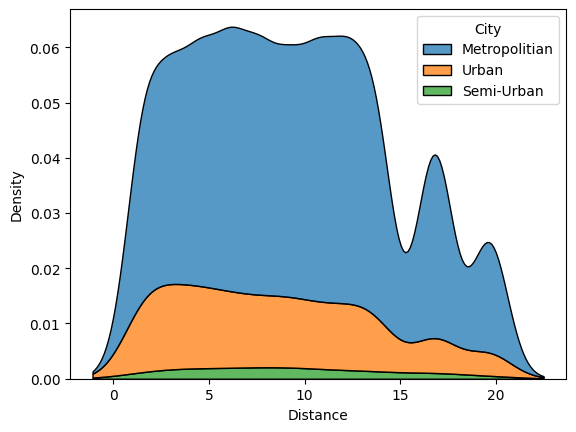

In [78]:
sns.kdeplot(data=df, x="Distance", hue="City", multiple="stack")

<Axes: xlabel='Time_taken (min)', ylabel='Count'>

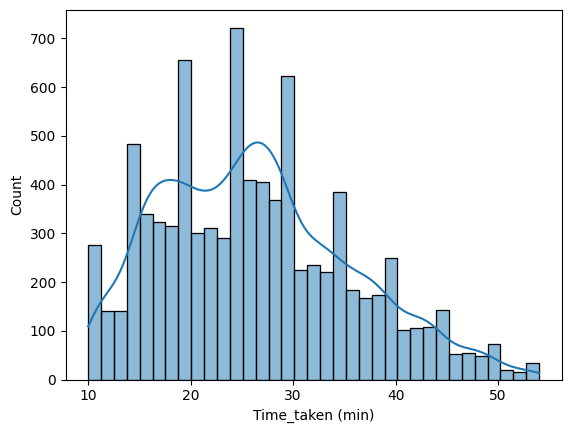

In [79]:
sns.histplot(data=df, x="Time_taken (min)", kde=True)

In [97]:
df['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [98]:
road_traffic = {'Jam':4, 'High':3, 'Medium':2, 'Low':1}

In [99]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [100]:
weather_condition = {'Fog':1, 'Stormy':2, 'Sandstorms':3, 'Windy':4, 'Cloudy':5, 'Sunny':6}

In [101]:
df['Vehicle_condition'].unique()

array([2, 1, 0, 3])

In [102]:
df['Type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [103]:
Type_of_order = {'Snack':1, 'Meal':2, 'Drinks':3, 'Buffet':4}

In [104]:
df['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [105]:
type_of_vehicle = {'motorcycle':1, 'scooter':2, 'electric_scooter':3, 'bicycle':4}

In [106]:
df['City'].unique()


array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [107]:
city = {'Metropolitian':1, 'Urban':2, 'Semi-Urban':3}

In [108]:
df['Road_traffic_density'] = df['Road_traffic_density'].map(road_traffic)
df['Weather_conditions'] = df['Weather_conditions'].map(weather_condition)
df['Type_of_order'] = df['Type_of_order'].map(Type_of_order)
df['Type_of_vehicle'] = df['Type_of_vehicle'].map(type_of_vehicle)
df['City'] = df['City'].map(city)

/tmp/ipykernel_578/1150932131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Road_traffic_density'] = df['Road_traffic_density'].map(road_traffic)
/tmp/ipykernel_578/1150932131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_conditions'] = df['Weather_conditions'].map(weather_condition)
/tmp/ipykernel_578/1150932131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [110]:
df.head(5)

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),Distance
0,30.33,78.05,30.40,78.12,1,4,2,1,1,3.0,1,46,10.27
1,10.00,76.31,10.04,76.35,2,3,1,2,1,1.0,1,23,6.23
2,18.56,73.92,18.65,74.01,3,2,1,3,2,1.0,1,21,13.76
3,30.90,75.81,30.92,75.83,3,1,0,4,1,0.0,1,20,2.93
4,26.46,80.37,26.59,80.50,1,4,1,1,2,1.0,1,41,19.37
